In [1]:
import itertools
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tsa.api as smt
from statsmodels.tsa.statespace.sarimax import SARIMAX
warnings.filterwarnings('ignore')

In [2]:
data = sm.datasets.co2.load_pandas()

In [3]:
y = data.data
y = y['co2'].resample('MS').mean()
y = y.fillna(y.bfill())


In [4]:
train = y[:'1997-12-01']
test = y['1998-01-01':]

## ARIMA(p, d, q) : Autoregressive Integrated Moving Average

In [5]:
arima_model = ARIMA(train, order = (1,1,1)).fit()

In [6]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    co2   No. Observations:                  478
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -575.768
Date:                Wed, 10 Jul 2024   AIC                           1157.537
Time:                        16:56:51   BIC                           1170.039
Sample:                    03-01-1958   HQIC                          1162.452
                         - 12-01-1997                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5669      0.054     10.586      0.000       0.462       0.672
ma.L1          0.3284      0.062      5.306      0.000       0.207       0.450
sigma2         0.6534      0.050     12.965      0.000       0.555       0.752
===================================================================================
Ljung-Box (L1) (Q):                   2.26   Jarque-Bera (JB):                 3.96
Prob(Q):                              0.13   Prob(JB):                         0.14
Heteroskedasticity (H):               0.98   Skew:                             0.09
Prob(H) (two-sided):                  0.89   Kurtosis:                         2.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [7]:
y_pred = arima_model.forecast(48)[0]
y_pred = pd.Series(y_pred, index=test.index)
y_pred

1998-01-01    365.558639
1998-02-01    365.558639
1998-03-01    365.558639
1998-04-01    365.558639
1998-05-01    365.558639
1998-06-01    365.558639
1998-07-01    365.558639
1998-08-01    365.558639
1998-09-01    365.558639
1998-10-01    365.558639
1998-11-01    365.558639
1998-12-01    365.558639
1999-01-01    365.558639
1999-02-01    365.558639
1999-03-01    365.558639
1999-04-01    365.558639
1999-05-01    365.558639
1999-06-01    365.558639
1999-07-01    365.558639
1999-08-01    365.558639
1999-09-01    365.558639
1999-10-01    365.558639
1999-11-01    365.558639
1999-12-01    365.558639
2000-01-01    365.558639
2000-02-01    365.558639
2000-03-01    365.558639
2000-04-01    365.558639
2000-05-01    365.558639
2000-06-01    365.558639
2000-07-01    365.558639
2000-08-01    365.558639
2000-09-01    365.558639
2000-10-01    365.558639
2000-11-01    365.558639
2000-12-01    365.558639
2001-01-01    365.558639
2001-02-01    365.558639
2001-03-01    365.558639
2001-04-01    365.558639


In [8]:
def plot_co2(train, test, y_pred, title):
    mae = mean_absolute_error(test, y_pred)
    train["1985":].plot(legend=True, label="TRAIN", title=f"{title}, MAE: {round(mae,2)}")
    test.plot(legend=True, label="TEST", figsize=(6, 4))
    y_pred.plot(legend=True, label="PREDICTION")
    plt.show()

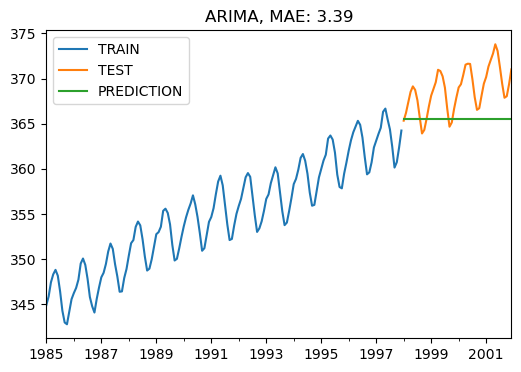

In [9]:
plot_co2(train, test, y_pred, "ARIMA")

Hiperparametre optimizasyonu yapalım. Bunun için burada AIC  ve BIC istatistiklerine göre model derecesini belirleyelim.

In [10]:
 p = d = q = range(0,4)
pdq = list(itertools.product(p, d, q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3),
 (3, 2, 0),
 (3, 2, 1),
 (3, 2, 2),
 (3, 2, 3),
 (3, 3, 0),
 (3, 3, 1),
 (3, 3, 2),
 (3, 3, 3)]

In [11]:
def arima_optimizer_aic(train, orders):
    best_aic, best_params = float("inf"), None
    for order in orders:
        try:
            arima_model_result = ARIMA(train, order=order).fit()
            aic = arima_model_result.aic
            if aic < best_aic:
                best_aic, best_params = aic, order
            print('ARIMA%s AIC=%.2f' % (order, aic))
        except Exception as e:
            print(f"ARIMA{order} modelinde hata oluştu: {e}")
            continue
    
    print('Best ARIMA%s AIC=%.2f' % (best_params, best_aic))
    return best_params

In [12]:
best_params_aic = arima_optimizer_aic(train, pdq)
best_params_aic

ARIMA(0, 0, 0) AIC=3954.01
ARIMA(0, 0, 1) AIC=3312.73
ARIMA(0, 0, 2) AIC=2771.31
ARIMA(0, 0, 3) AIC=2327.85
ARIMA(0, 1, 0) AIC=1523.91
ARIMA(0, 1, 1) AIC=1254.79
ARIMA(0, 1, 2) AIC=1137.97
ARIMA(0, 1, 3) AIC=1094.51
ARIMA(0, 2, 0) AIC=1279.81
ARIMA(0, 2, 1) AIC=1257.89
ARIMA(0, 2, 2) AIC=1247.74
ARIMA(0, 2, 3) AIC=1141.50
ARIMA(0, 3, 0) AIC=1482.91
ARIMA(0, 3, 1) AIC=1286.29
ARIMA(0, 3, 2) AIC=1264.04
ARIMA(0, 3, 3) AIC=1253.48
ARIMA(1, 0, 0) AIC=1536.61
ARIMA(1, 0, 1) AIC=1267.22
ARIMA(1, 0, 2) AIC=1149.98
ARIMA(1, 0, 3) AIC=1105.72
ARIMA(1, 1, 0) AIC=1207.78
ARIMA(1, 1, 1) AIC=1157.54
ARIMA(1, 1, 2) AIC=1113.98
ARIMA(1, 1, 3) AIC=1095.90
ARIMA(1, 2, 0) AIC=1256.05
ARIMA(1, 2, 1) AIC=1257.80
ARIMA(1, 2, 2) AIC=1161.11
ARIMA(1, 2, 3) AIC=1117.55
ARIMA(1, 3, 0) AIC=1418.84
ARIMA(1, 3, 1) AIC=1262.07
ARIMA(1, 3, 2) AIC=1263.83
ARIMA(1, 3, 3) AIC=1253.50
ARIMA(2, 0, 0) AIC=1217.86
ARIMA(2, 0, 1) AIC=1168.38
ARIMA(2, 0, 2) AIC=1124.96
ARIMA(2, 0, 3) AIC=1106.92
ARIMA(2, 1, 0) AIC=1103.53
A

(2, 1, 3)

In [13]:
arima_model_last = ARIMA(train, order= best_params_aic).fit()
y_pred_last = arima_model_last.forecast(48)

In [14]:
y_pred_last = pd.Series(y_pred_last, index= test.index)
y_pred_last

1998-01-01    365.496116
1998-02-01    366.274659
1998-03-01    366.678754
1998-04-01    366.611928
1998-05-01    366.104972
1998-06-01    365.304258
1998-07-01    364.429790
1998-08-01    363.714961
1998-09-01    363.344429
1998-10-01    363.406629
1998-11-01    363.873057
1998-12-01    364.609063
1999-01-01    365.412433
1999-02-01    366.068762
1999-03-01    366.408517
1999-04-01    366.350631
1999-05-01    365.921493
1999-06-01    365.244967
1999-07-01    364.506915
1999-08-01    363.904299
1999-09-01    363.592767
1999-10-01    363.646628
1999-11-01    364.041457
1999-12-01    364.663309
2000-01-01    365.341353
2000-02-01    365.894651
2000-03-01    366.180303
2000-04-01    366.130196
2000-05-01    365.766934
2000-06-01    365.195338
2000-07-01    364.572423
2000-08-01    364.064408
2000-09-01    363.802486
2000-10-01    363.849095
2000-11-01    364.183313
2000-12-01    364.708714
2001-01-01    365.280981
2001-02-01    365.747419
2001-03-01    365.987580
2001-04-01    365.944232


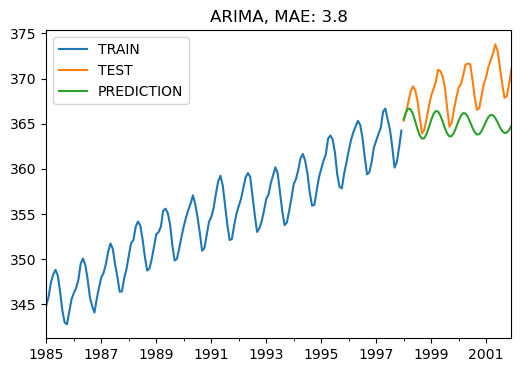

In [15]:
plot_co2(train, test, y_pred_last, "ARIMA")

## SARIMA(p, d, q)(P, D, Q)m : Seasonal Autoregressive Integrated Moving Average

In [16]:
sarima_model = SARIMAX(train, order=(1, 0, 1), seasonal_order=(0, 0, 0, 12)).fit(disp= 0)

In [17]:
y_pred = sarima_model.get_forecast(steps = 48)
y_pred = y_pred.predicted_mean

y_pred = pd.Series(y_pred)

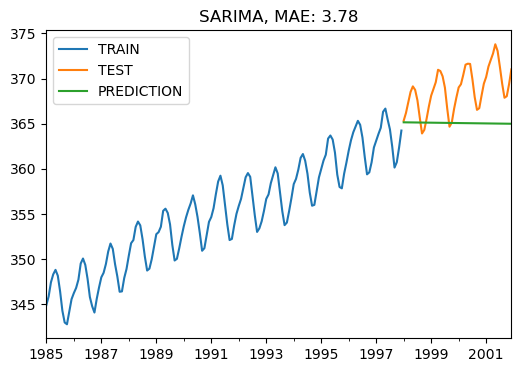

In [18]:
plot_co2(train, test, y_pred, "SARIMA")

In [19]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [20]:
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [21]:
def sarima_optimizer_aic(train, pdq, seasonal_pdq):
    best_aic, best_order, best_seasonal_order = float("inf"), None, None
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                sarimax_model = SARIMAX(train, order=param, seasonal_order=param_seasonal)
                results = sarimax_model.fit(disp=0)
                aic = results.aic
                if aic < best_aic:
                    best_aic, best_order, best_seasonal_order = aic, param, param_seasonal
                print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, aic))
            except:
                continue
    print('En iyi SARIMA{}x{}12 - AIC:{}'.format(best_order, best_seasonal_order, best_aic))
    return best_order, best_seasonal_order

In [22]:
best_order, best_seasonal_order = sarima_optimizer_aic(train, pdq, seasonal_pdq)


SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:6922.606550808509
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:6318.305219679605
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1643.9996657880379
SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1428.2938925348124
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1848.0993456090828
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1612.2683883996215
SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1205.025400970745
SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:973.2077278775928
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:6269.190364756832
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:5663.567928540047
SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1229.8447515675364
SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1126.584317698846
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1513.1036180035053
SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2018.2831783706997
SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1008.1602684848547
SARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:767.6332845902709
SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1523.9134546907358
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1

In [23]:
sarima_model_last = SARIMAX(train, order = (best_order), seasonal_order= (best_seasonal_order)).fit(disp= 0 )

In [24]:
y_pred_last = sarima_model_last.get_forecast(steps = 48).predicted_mean
y_pred_last = pd.Series(y_pred_last, index= test.index)
y_pred_last

1998-01-01    365.052787
1998-02-01    365.752904
1998-03-01    366.636493
1998-04-01    367.914300
1998-05-01    368.428985
1998-06-01    367.746770
1998-07-01    366.211218
1998-08-01    364.162228
1998-09-01    362.415345
1998-10-01    362.582362
1998-11-01    363.930922
1998-12-01    365.352574
1999-01-01    366.381596
1999-02-01    367.177226
1999-03-01    368.101139
1999-04-01    369.395970
1999-05-01    369.917842
1999-06-01    369.238662
1999-07-01    367.704391
1999-08-01    365.655942
1999-09-01    363.909287
1999-10-01    364.076400
1999-11-01    365.425001
1999-12-01    366.846670
2000-01-01    367.875699
2000-02-01    368.671333
2000-03-01    369.595247
2000-04-01    370.890079
2000-05-01    371.411951
2000-06-01    370.732771
2000-07-01    369.198499
2000-08-01    367.150050
2000-09-01    365.403396
2000-10-01    365.570509
2000-11-01    366.919109
2000-12-01    368.340778
2001-01-01    369.369808
2001-02-01    370.165441
2001-03-01    371.089355
2001-04-01    372.384187


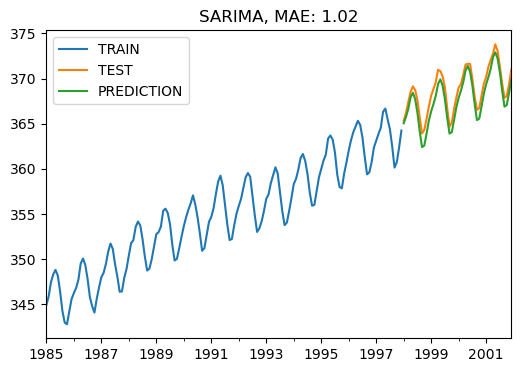

In [25]:
plot_co2(train, test, y_pred_last, "SARIMA")

En iyi parametreyi bulma konusunda AIC değil de MAE kullanalım.

In [26]:
def sarima_optimizer_mae(train, pdq, seasonal_pdq):
    best_mae, best_order, best_seasonal_order = float("inf"), None, None
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                model = SARIMAX(train, order=param, seasonal_order=param_seasonal)
                sarima_model = model.fit(disp=0)
                y_pred_test = sarima_model.get_forecast(steps=48)
                y_pred = y_pred_test.predicted_mean
                mae = mean_absolute_error(test, y_pred)
                if mae < best_mae:
                    best_mae, best_order, best_seasonal_order = mae, param, param_seasonal
                print('SARIMA{}x{}12 - MAE:{}'.format(param, param_seasonal, mae))
            except:
                continue
    print('En iyi SARIMA{}x{}12 - MAE:{}'.format(best_order, best_seasonal_order, best_mae))
    return best_order, best_seasonal_order

In [27]:
best_order, best_seasonal_order = sarima_optimizer_mae(train, pdq, seasonal_pdq)

SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - MAE:368.7634375
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - MAE:324.17909156740507
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - MAE:5.063020833333329
SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - MAE:4.803324370547172
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - MAE:5.103491046660754
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - MAE:4.830994303016506
SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - MAE:3.3237249310891976
SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - MAE:1.527984494774979
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - MAE:364.91786914276616
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - MAE:320.4050599429142
SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - MAE:4.985339497153716
SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - MAE:4.765306173863472
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - MAE:5.0127995332122595
SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - MAE:5.117741736562659
SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - MAE:3.6741492133341396
SARIMA(0, 0, 1)x(1, 1, 1, 12)12 - MAE:1.5667538351132464
SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - MAE:4.526979166666664
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - MAE:3.93154014

In [28]:
model_last = SARIMAX(train, order=best_order, seasonal_order=best_seasonal_order).fit(disp = 0)

In [29]:
y_pred = model_last.get_forecast(steps=48).predicted_mean
y_pred = pd.Series(y_pred, index=test.index)

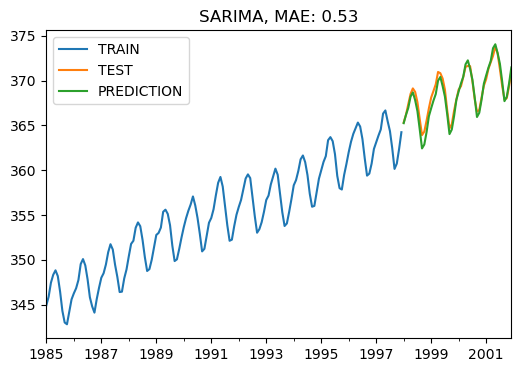

In [30]:
plot_co2(train, test, y_pred, "SARIMA")

Tüm smoothing ve istatistiksel modelleri denedik ve en iyisinin SARIMA olduğuna karar verdik. Şimdi ise verisetini hiç bölmeden son kez bir model oluşturalım ve gelecek 6  ay için bir tahmin elde edelim.

In [31]:
model = SARIMAX(y, order=best_order, seasonal_order=best_seasonal_order)
sarima_final_model = model.fit(disp=0)

In [32]:
feature_predict = sarima_final_model.get_forecast(steps=6)
feature_predict = feature_predict.predicted_mean
feature_predict

2002-01-01    371.930534
2002-02-01    372.718068
2002-03-01    373.585288
2002-04-01    374.494059
2002-05-01    375.101881
2002-06-01    374.687873
Freq: MS, Name: predicted_mean, dtype: float64